In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno

In [3]:
pd.__version__

'1.4.4'

In [4]:
salary_df = pd.read_csv("Salary_Data_Based_country_and_race.csv", sep=",", index_col= "Unnamed: 0")

ValueError: Index Unnamed: 0 invalid

In [ ]:
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.000,Male,Bachelor's,Software Engineer,5.000,90000.000,UK,White
1,28.000,Female,Master's,Data Analyst,3.000,65000.000,USA,Hispanic
2,45.000,Male,PhD,Senior Manager,15.000,150000.000,Canada,White
3,36.000,Female,Bachelor's,Sales Associate,7.000,60000.000,USA,Hispanic
4,52.000,Male,Master's,Director,20.000,200000.000,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.000,Female,PhD,Director of Marketing,20.000,200000.000,UK,Mixed
6700,32.000,Male,High School,Sales Associate,3.000,50000.000,Australia,Australian
6701,30.000,Female,Bachelor's Degree,Financial Manager,4.000,55000.000,China,Chinese
6702,46.000,Male,Master's Degree,Marketing Manager,14.000,140000.000,China,Korean


In [ ]:
salary_df.shape

(6704, 8)

In [ ]:
salary_df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race'],
      dtype='object')

In [ ]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.4+ KB


In [ ]:
salary_df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [ ]:
salary_df.isnull().sum()/len(salary_df)*100

Age                    0.029833
Gender                 0.029833
Education Level        0.044749
Job Title              0.029833
Years of Experience    0.044749
Salary                 0.074582
Country                0.000000
Race                   0.000000
dtype: float64

In [ ]:
!pip install missingno


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


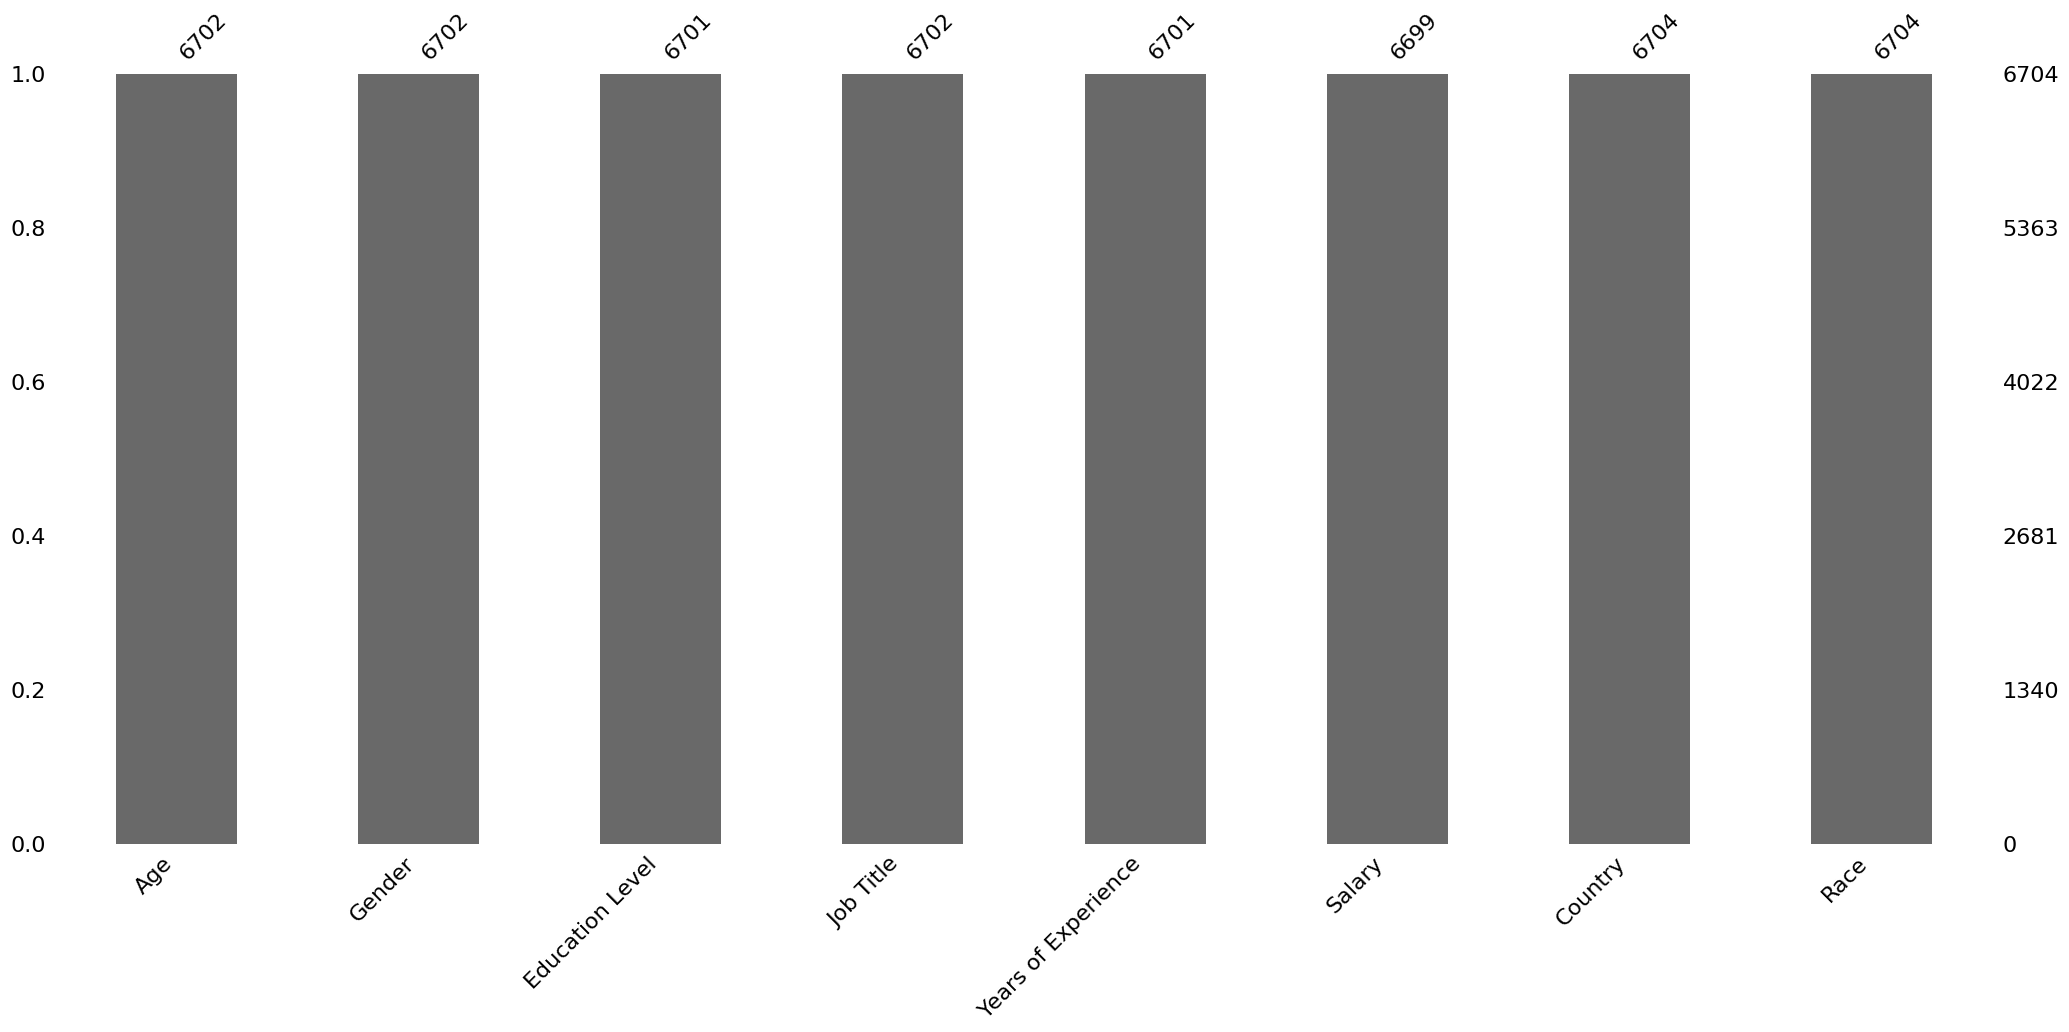

In [ ]:
msno.bar(salary_df)
plt.show()

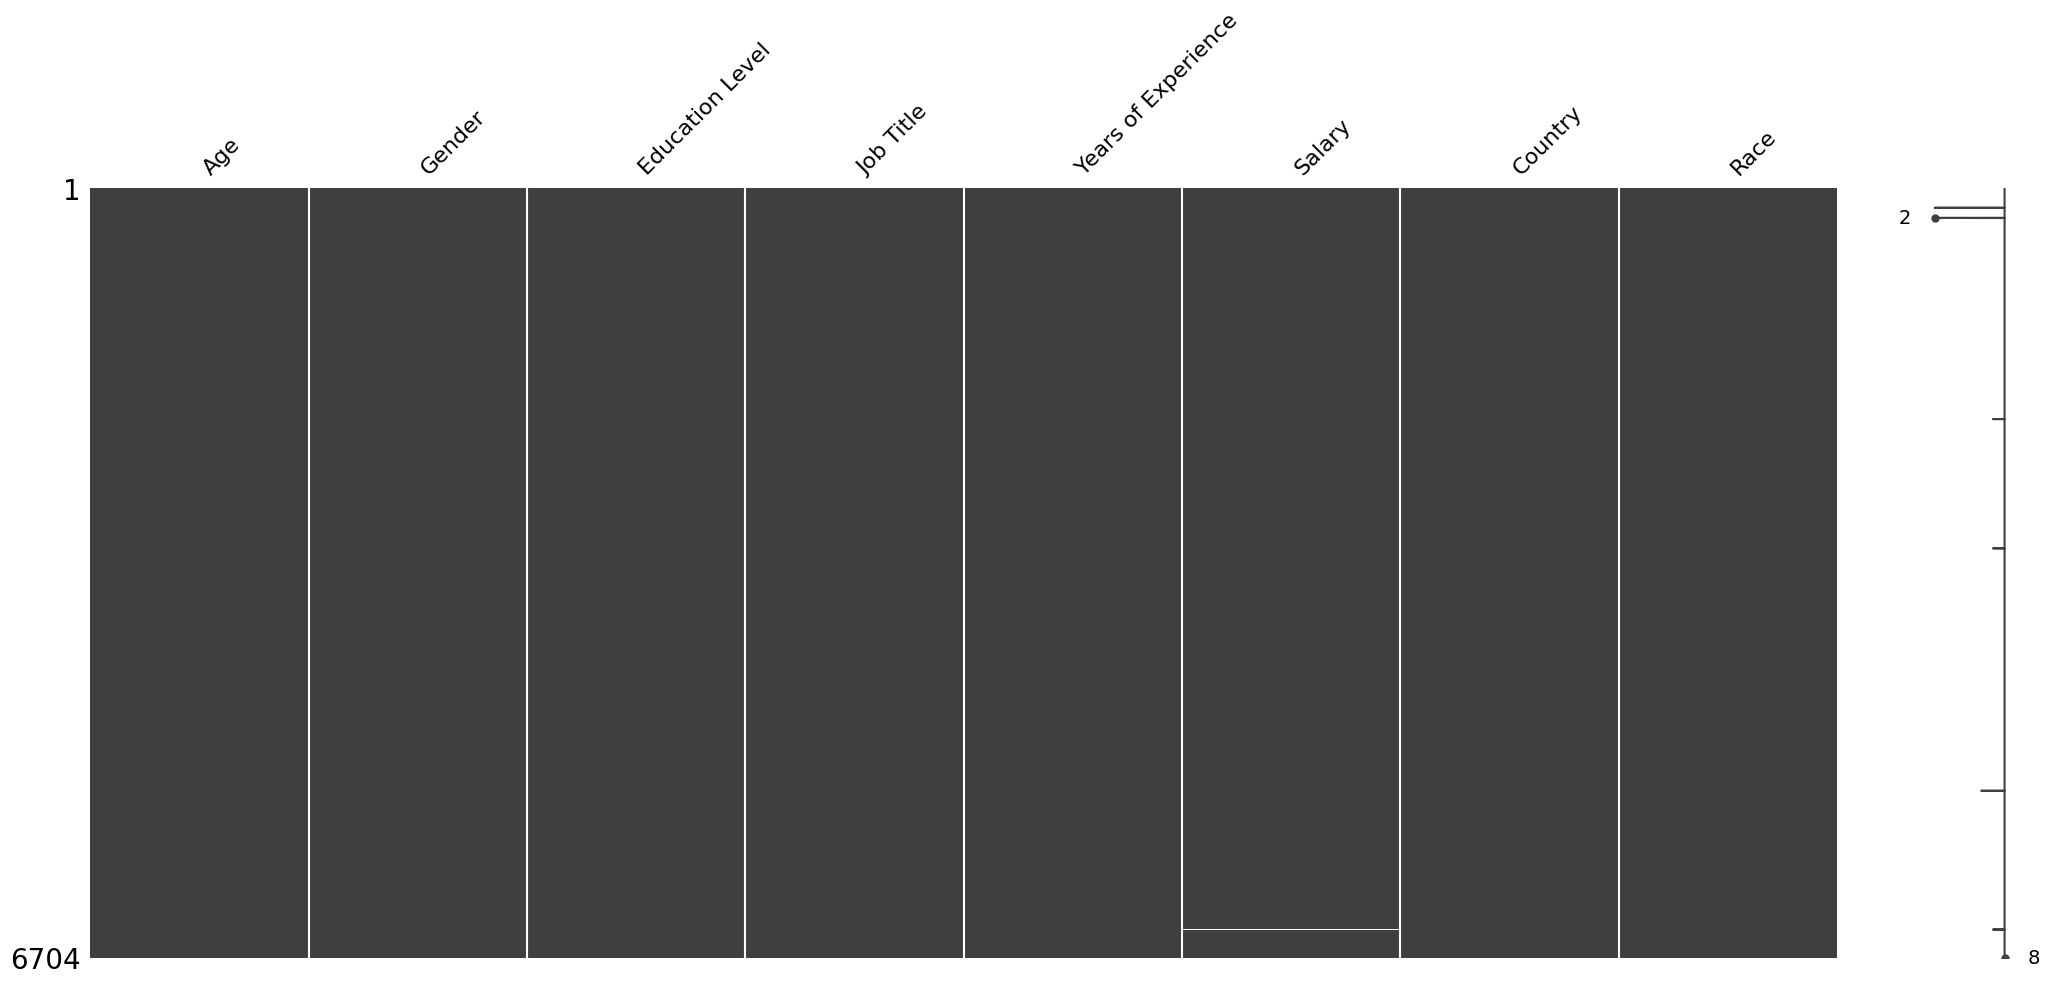

In [ ]:
msno.matrix(salary_df)
plt.show()

In [ ]:
salary = salary_df.dropna()

In [ ]:
salary.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [ ]:
salary_stats = salary.describe().transpose().sort_values(by="std")
salary_stats

,count,mean,std,min,25%,50%,75%,max
Years of Experience,6698.0,8.095178,6.060291,0.0,3.0,7.0,12.0,34.0
Age,6698.0,33.623022,7.615784,21.0,28.0,32.0,38.0,62.0
Salary,6698.0,115329.253061,52789.792507,350.0,70000.0,115000.0,160000.0,250000.0


In [ ]:
salary.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race'],
      dtype='object')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
salary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,6698.000,33.623,7.616,21.000,28.000,32.000,38.000,62.000
Years of Experience,6698.000,8.095,6.060,0.000,3.000,7.000,12.000,34.000
Salary,6698.000,115329.253,52789.793,350.000,70000.000,115000.000,160000.000,250000.000


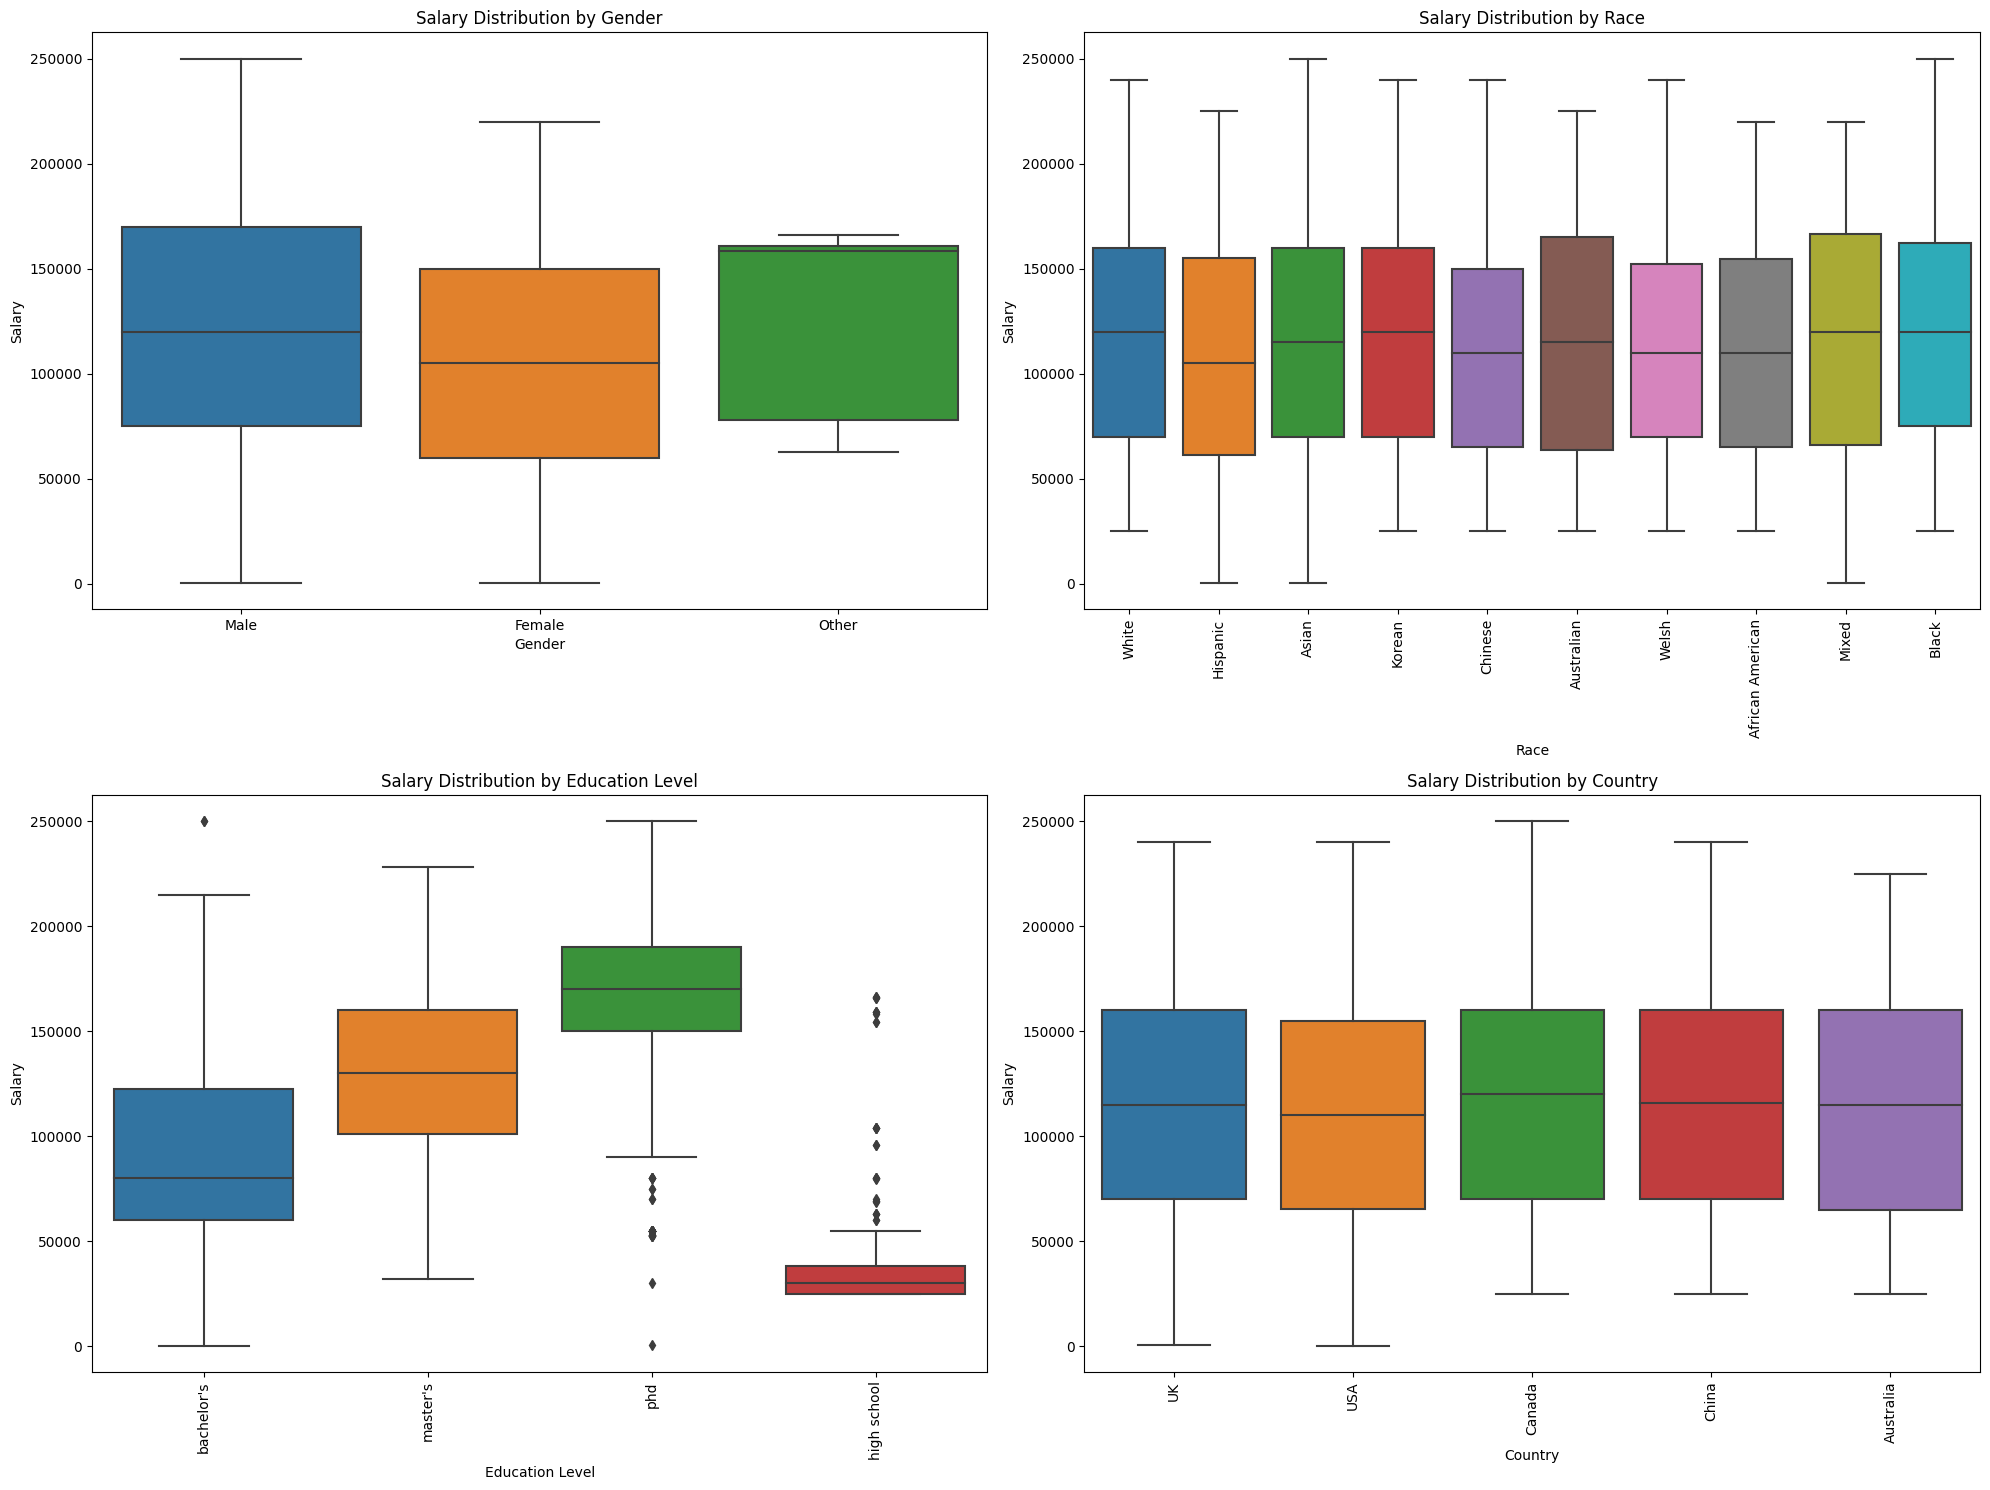

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.boxplot(data=salary, x='Gender', y='Salary')
plt.title('Salary Distribution by Gender')

plt.subplot(2, 2, 2)
sns.boxplot(data=salary, x='Race', y='Salary')
plt.xticks(rotation=90)
plt.title('Salary Distribution by Race')

plt.subplot(2, 2, 3)
sns.boxplot(data=salary, x='Education Level', y='Salary')
plt.xticks(rotation=90)
plt.title('Salary Distribution by Education Level')

plt.subplot(2, 2, 4)
sns.boxplot(data=salary, x='Country', y='Salary')
plt.xticks(rotation=90)
plt.title('Salary Distribution by Country')

plt.tight_layout()
plt.show()

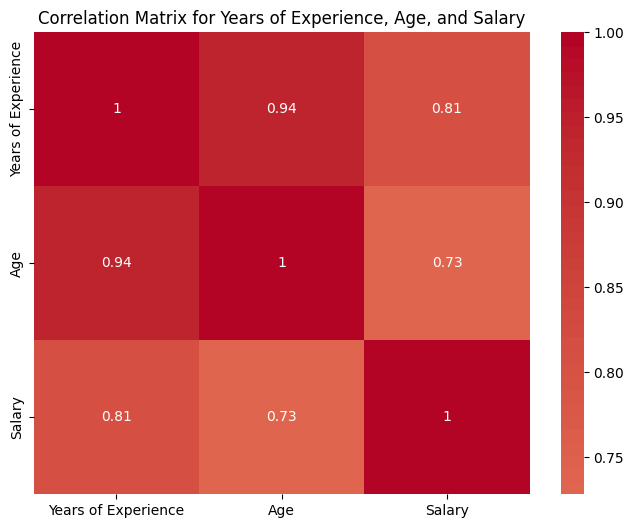

In [ ]:
correlation_matrix = salary[['Years of Experience', 'Age', 'Salary']].corr()

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Years of Experience, Age, and Salary Correlation Matrix')
plt.show()

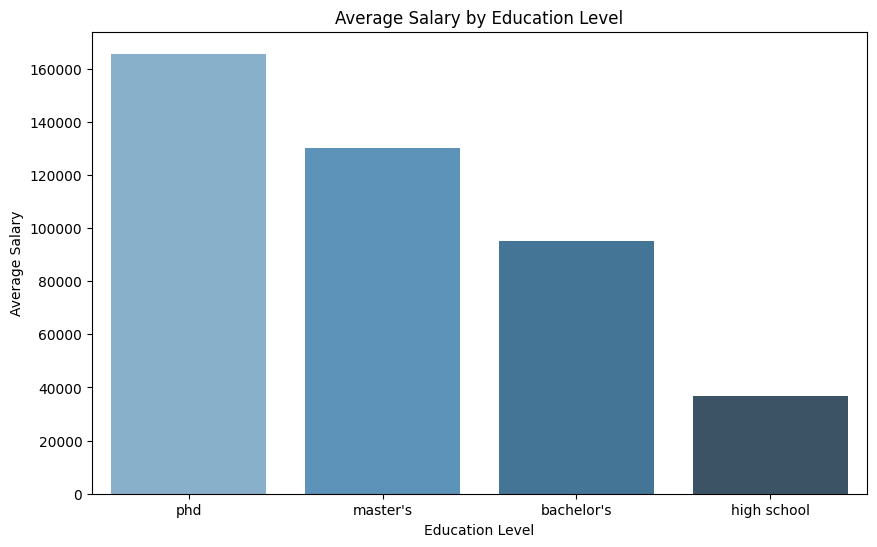

In [ ]:
# Calculate average salary for each education level
average_salary_by_education = salary.groupby('Education Level')['Salary'].mean().sort_values(ascending=False)

# Plot the average salary for each education level
plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary_by_education.index, y=average_salary_by_education.values, palette="Blues_d")
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks()
plt.show()

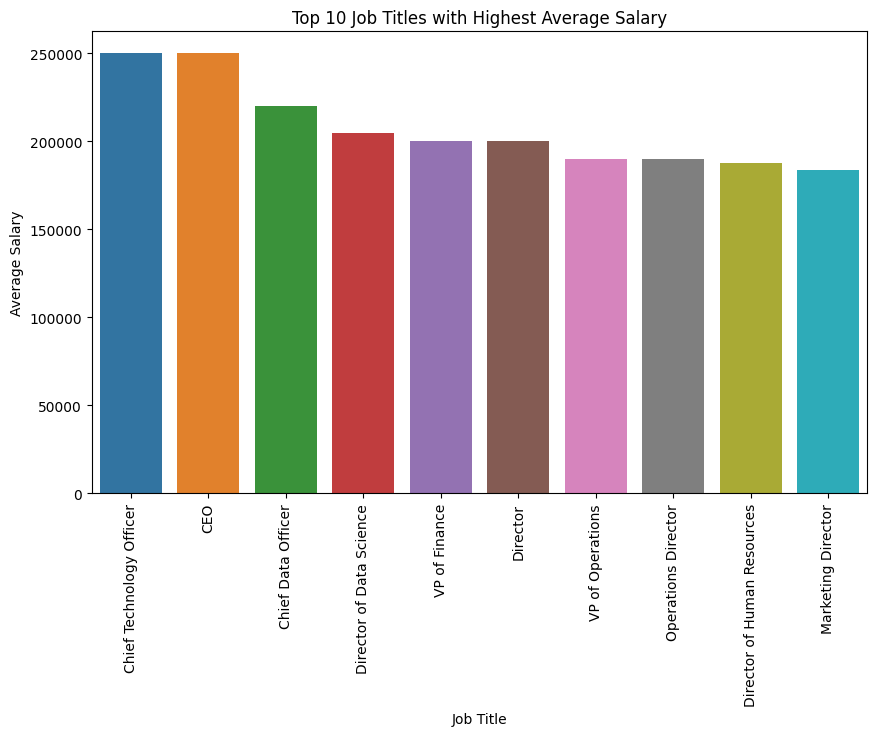

In [ ]:
average_salary_by_job = salary.groupby('Job Title')['Salary'].mean().sort_values(ascending=False)

top_10_jobs = average_salary_by_job[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_jobs.index, y=top_10_jobs.values)
plt.title('Top 10 Job Titles with Highest Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

In [ ]:
salary['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [ ]:
salary['Education Level'] = salary['Education Level'].str.lower()
salary['Education Level'] = salary['Education Level'].replace({"bachelor's degree": "bachelor's", "master's degree": "master's"})

salary['Education Level'].unique()

C:\Users\gefig\AppData\Local\Temp\ipykernel_2752\4114793842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['Education Level'] = salary['Education Level'].str.lower()
C:\Users\gefig\AppData\Local\Temp\ipykernel_2752\4114793842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['Education Level'] = salary['Education Level'].replace({"bachelor's degree": "bachelor's", "master's degree": "master's"})


array(["bachelor's", "master's", 'phd', 'high school'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
education_level_order = ['high school', 'bachelor\'s', 'master\'s', 'phd']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Years of Experience', 'Age']),
        ('cat', OneHotEncoder(drop='first'), ['Gender', 'Country', 'Race', 'Job Title']),
        ('ord', OrdinalEncoder(categories=[education_level_order]), ['Education Level'])
    ])

sal_preprocessed = preprocessor.fit_transform(salary)

sal_preprocessed = pd.DataFrame(sal_preprocessed)

sal_preprocessed.head()

,0
0,"(0, 0)\t5.0\n (0, 1)\t32.0\n (0, 2)\t1.0\n..."
1,"(0, 0)\t3.0\n (0, 1)\t28.0\n (0, 7)\t1.0\n..."
2,"(0, 0)\t15.0\n (0, 1)\t45.0\n (0, 2)\t1.0\..."
3,"(0, 0)\t7.0\n (0, 1)\t36.0\n (0, 7)\t1.0\n..."
4,"(0, 0)\t20.0\n (0, 1)\t52.0\n (0, 2)\t1.0\..."


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Years of Experience', 'Age', 'Salary']),
        ('cat', OneHotEncoder(drop='first'), ['Gender', 'Country', 'Race']),
        ('ord', OrdinalEncoder(categories=[education_level_order]), ['Education Level'])
    ], remainder='drop', sparse_threshold=0)

sal_preprocessed = preprocessor.fit_transform(salary)


one_hot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=['Gender', 'Country', 'Race'])

feature_names = np.concatenate([one_hot_feature_names, ['Years of Experience', 'Age', 'Education Level', 'Salary']])

sal_preprocessed = pd.DataFrame(sal_preprocessed, columns=feature_names)

sal_preprocessed['Job Title'] = salary['Job Title']

sal_preprocessed.head()

,Gender_Male,Gender_Other,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Years of Experience,Age,Education Level,Salary,Job Title
0,5.000,32.000,90000.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,Software Engineer
1,3.000,28.000,65000.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,2.000,Data Analyst
2,15.000,45.000,150000.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000,Senior Manager
3,7.000,36.000,60000.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,Sales Associate
4,20.000,52.000,200000.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,Director


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Gender', 'Country', 'Race']),
        ('ord', OrdinalEncoder(categories=[education_level_order]), ['Education Level']),
        ('num', 'passthrough', ['Years of Experience', 'Age', 'Salary'])
    ], remainder='drop', sparse_threshold=0)

sal_preprocessed = preprocessor.fit_transform(salary)

one_hot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=['Gender', 'Country', 'Race'])

feature_names = np.concatenate([one_hot_feature_names, ['Education Level', 'Years of Experience', 'Age', 'Salary']])

sal_preprocessed = pd.DataFrame(sal_preprocessed, columns=feature_names)

sal_preprocessed['Job Title'] = salary['Job Title']

sal_preprocessed.head()

,Gender_Male,Gender_Other,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Education Level,Years of Experience,Age,Salary,Job Title
0,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,5.000,32.000,90000.000,Software Engineer
1,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,2.000,3.000,28.000,65000.000,Data Analyst
2,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000,15.000,45.000,150000.000,Senior Manager
3,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,7.000,36.000,60000.000,Sales Associate
4,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,20.000,52.000,200000.000,Director


In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Years of Experience', 'Age', 'Salary']

scaler = StandardScaler()

sal_preprocessed[columns_to_scale] = scaler.fit_transform(sal_preprocessed[columns_to_scale])

sal_preprocessed.head()

,Gender_Male,Gender_Other,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Education Level,Years of Experience,Age,Salary,Job Title
0,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,-0.511,-0.213,-0.480,Software Engineer
1,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,2.000,-0.841,-0.738,-0.953,Data Analyst
2,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000,1.139,1.494,0.657,Senior Manager
3,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,-0.181,0.312,-1.048,Sales Associate
4,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,1.965,2.413,1.604,Director


In [ ]:
from sklearn.model_selection import train_test_split

X = sal_preprocessed.drop(['Salary', 'Job Title'], axis=1)
y = sal_preprocessed['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5358, 18), (1340, 18), (5358,), (1340,))

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

mse, r2

(0.2981690122137953, 0.7086396816279346)

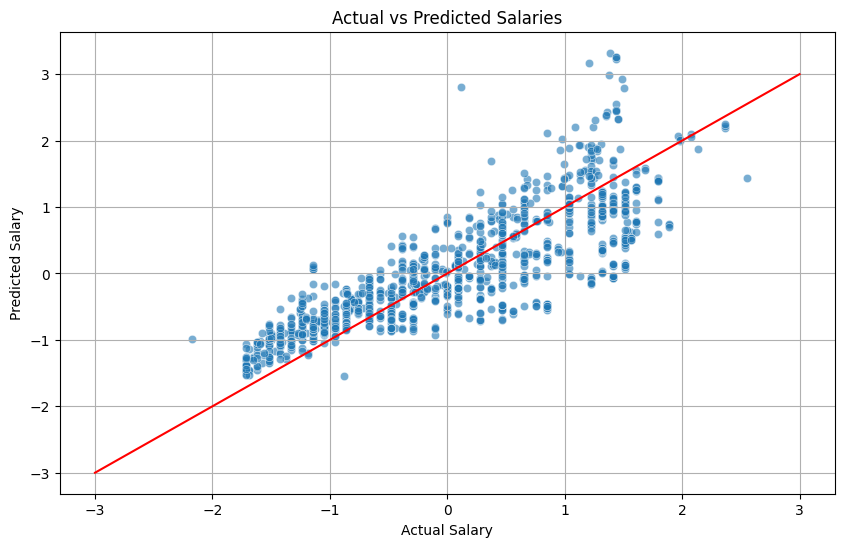

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([-3, 3], [-3, 3], color='red')  # diagonal line for reference
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salaries')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)

rf_r2 = r2_score(y_test, rf_y_pred)

rf_mse, rf_r2

(0.10434902428908696, 0.898033787237143)

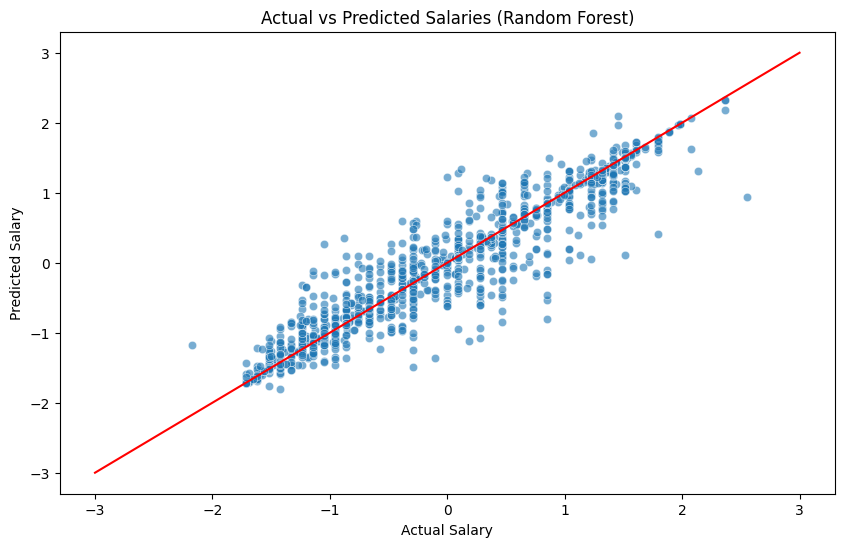

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_y_pred, alpha=0.6)
plt.plot([-3, 3], [-3, 3], color='red')  # diagonal line for reference
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salaries (Random Forest)')
plt.show()

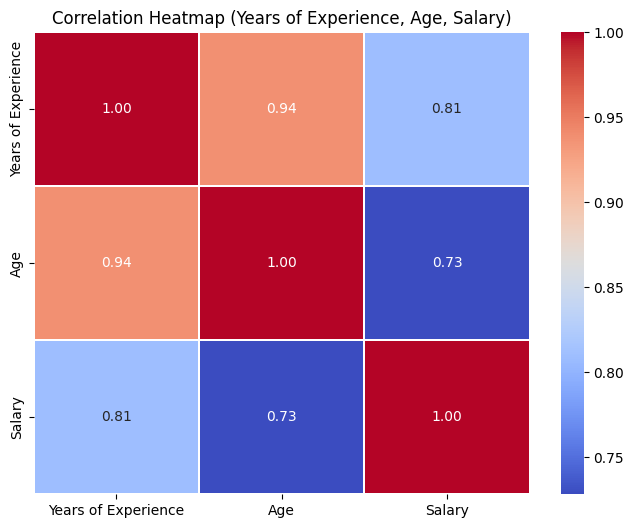

In [ ]:
correlation_matrix = salary[['Years of Experience', 'Age', 'Salary']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('Correlation Heatmap (Years of Experience, Age, Salary)')
plt.show()

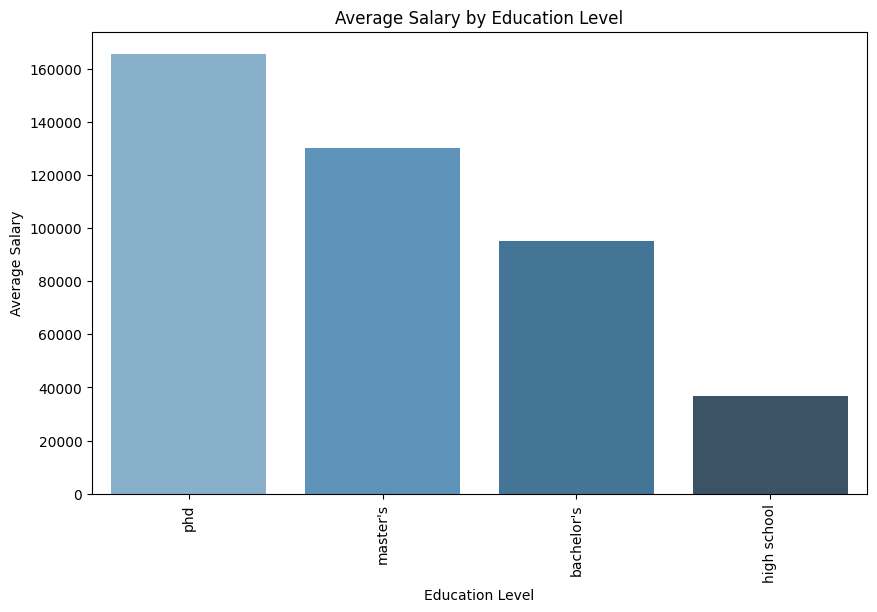

In [ ]:
average_salary_by_education = salary.groupby('Education Level')['Salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary_by_education.index, y=average_salary_by_education.values, palette="Blues_d")
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

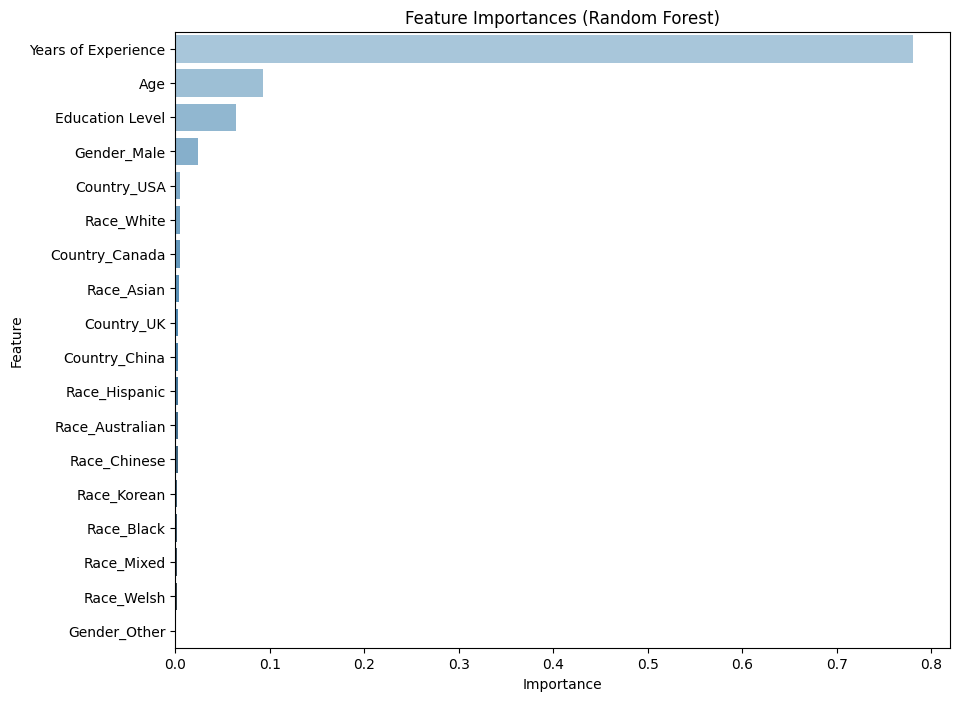

In [ ]:
importances = rf_model.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

importances_salary = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_salary, palette="Blues_d")
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

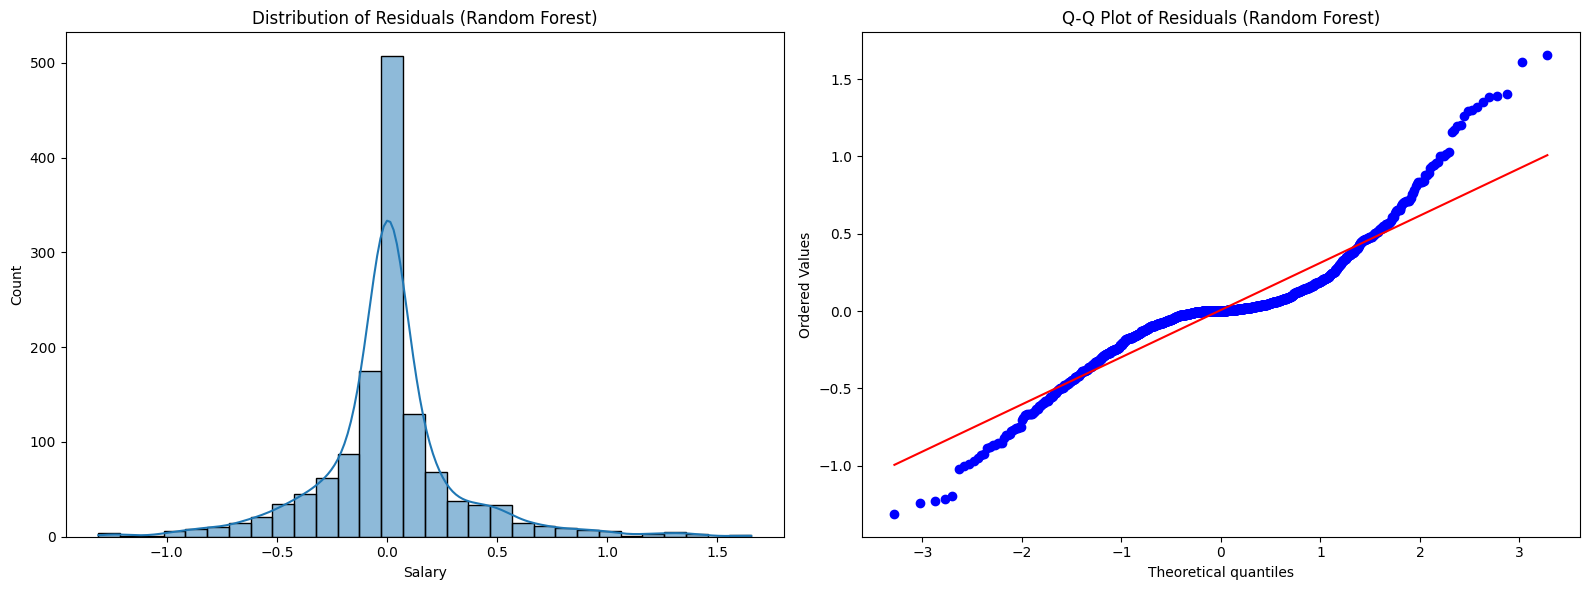

In [ ]:
from scipy.stats import probplot

residuals = y_test - rf_y_pred

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(residuals, bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Residuals (Random Forest)')

probplot(residuals, plot=ax[1])
ax[1].set_title('Q-Q Plot of Residuals (Random Forest)')

plt.tight_layout()
plt.show()

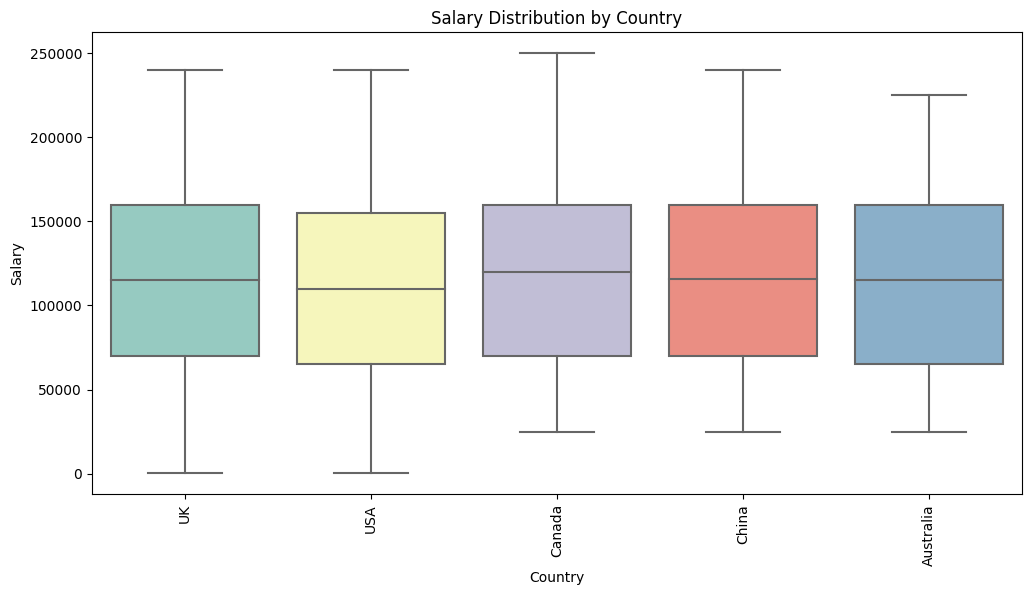

In [ ]:
top_countries = salary['Country'].value_counts().index[:10]

sal_top_countries = salary[salary['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Salary', data=sal_top_countries, palette="Set3")
plt.title('Salary Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

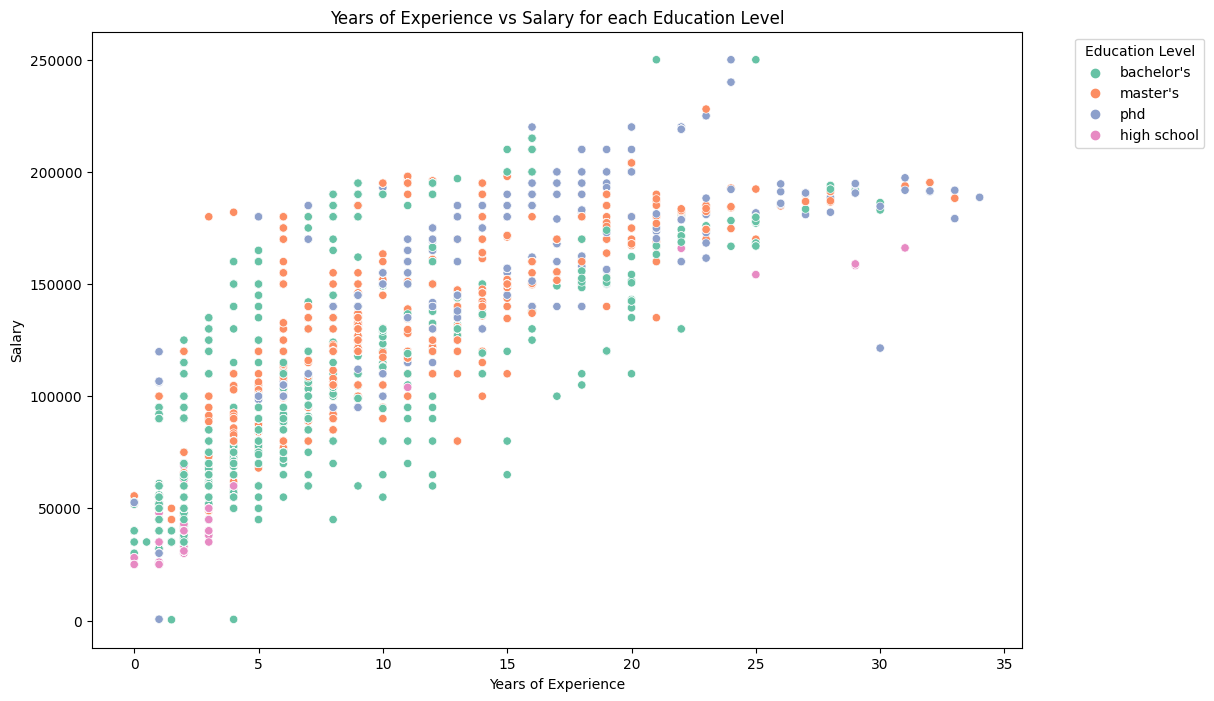

In [ ]:
sal_experience_education = salary[['Years of Experience', 'Salary', 'Education Level']]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Years of Experience', y='Salary', hue='Education Level', data=sal_experience_education, palette='Set2')
plt.title('Years of Experience vs Salary for each Education Level')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

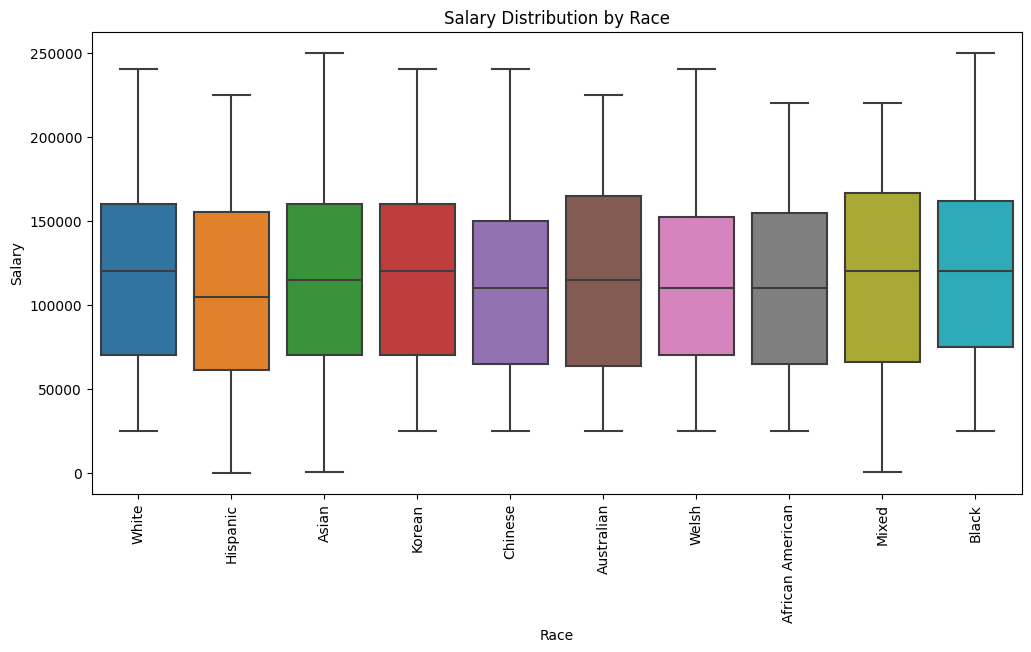

In [ ]:
top_races = salary['Race'].value_counts().index[:10]

sal_top_races = salary[salary['Race'].isin(top_races)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Race', y='Salary', data=sal_top_races)
plt.title('Salary Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

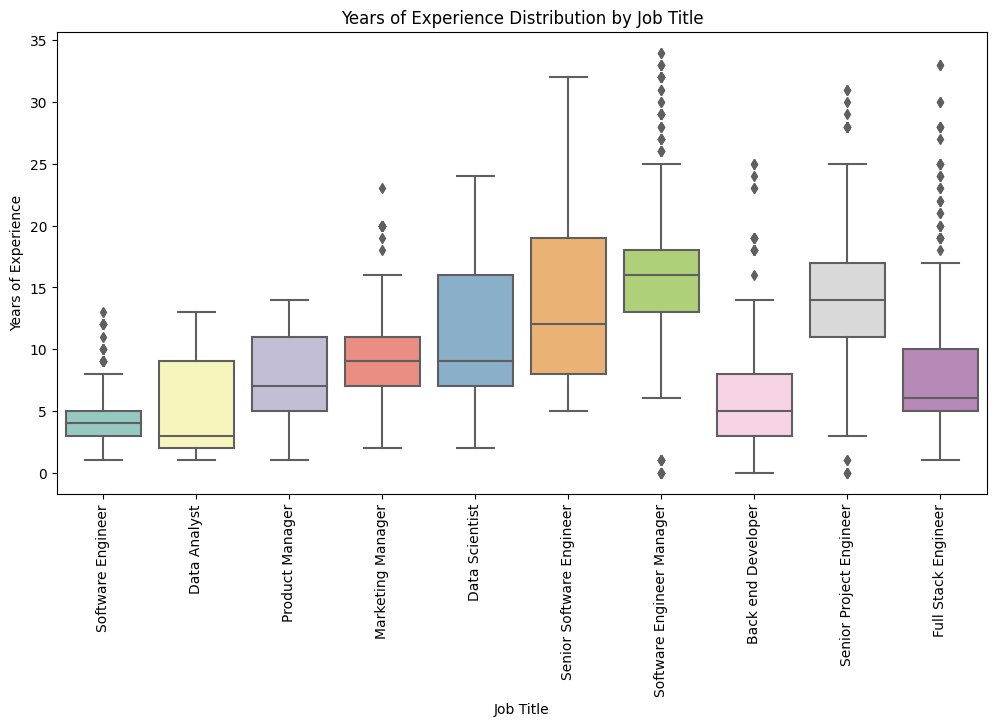

In [ ]:
top_job_titles = salary['Job Title'].value_counts().index[:10]

sal_top_job_titles = salary[salary['Job Title'].isin(top_job_titles)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Job Title', y='Years of Experience', data=sal_top_job_titles, palette="Set3")
plt.title('Years of Experience Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Years of Experience')
plt.xticks(rotation=90)
plt.show()

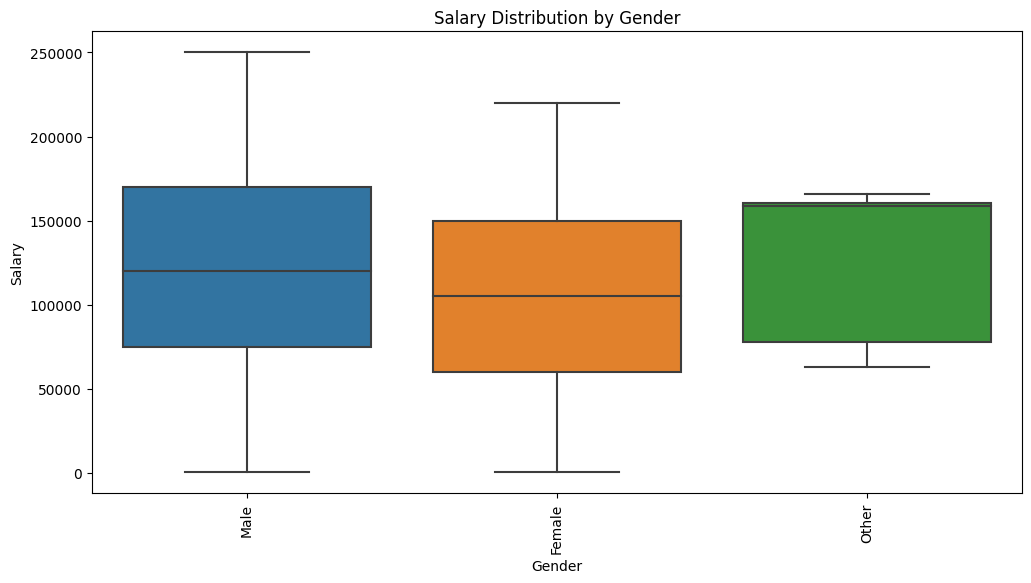

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Salary', data=salary)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

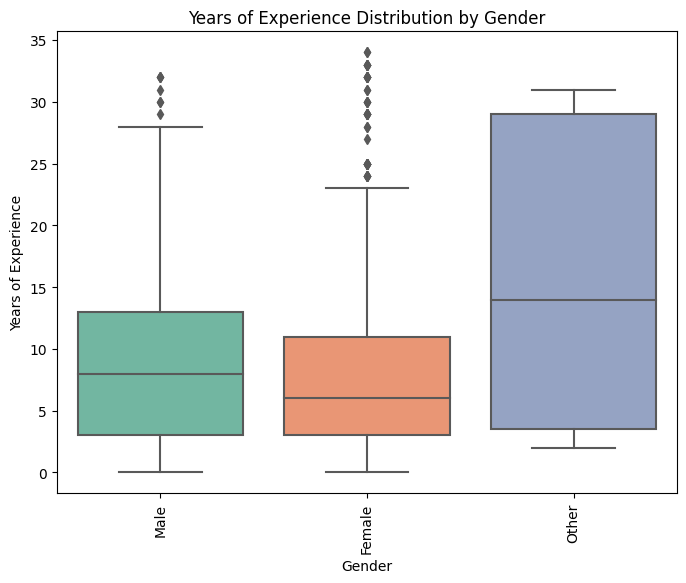

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Years of Experience', data=salary, palette="Set2")
plt.title('Years of Experience Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Years of Experience')
plt.xticks(rotation=90)
plt.show()

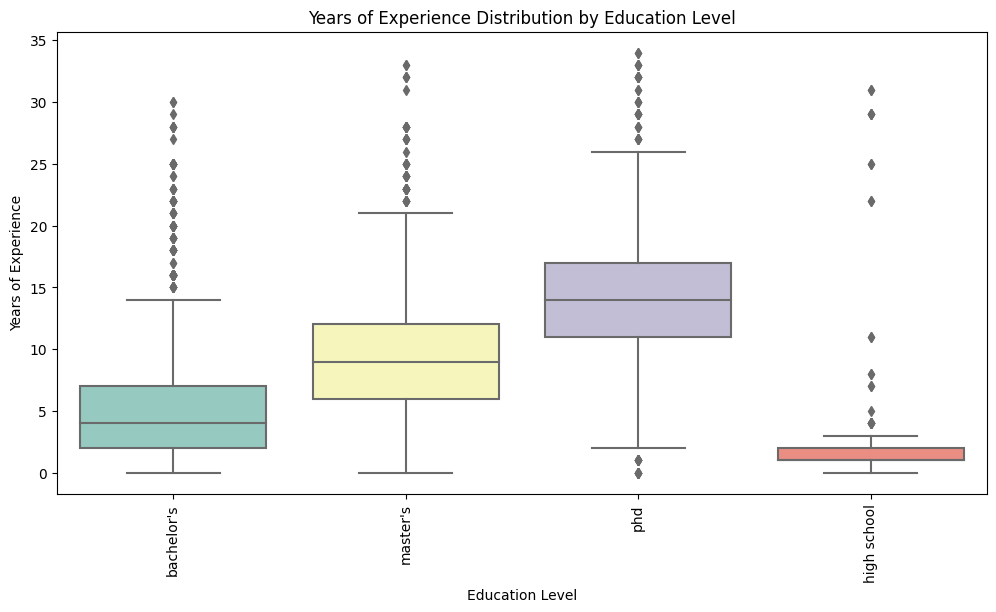

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Years of Experience', data=salary, palette="Set3", order=salary['Education Level'].value_counts().index)
plt.title('Years of Experience Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Years of Experience')
plt.xticks(rotation=90)
plt.show()

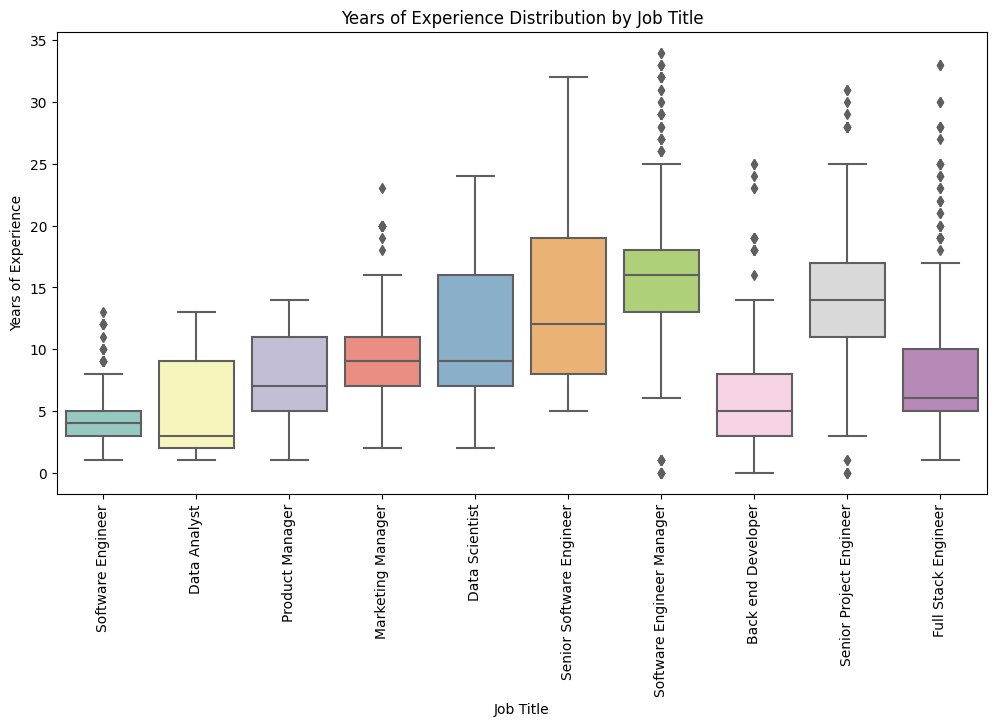

In [ ]:
top_job_titles_exp = salary['Job Title'].value_counts().index[:10]

sal_top_job_titles_exp = salary[salary['Job Title'].isin(top_job_titles_exp)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Job Title', y='Years of Experience', data=sal_top_job_titles_exp, palette="Set3")
plt.title('Years of Experience Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Years of Experience')
plt.xticks(rotation=90)
plt.show()